## Import libs

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.data import Dataset
import seaborn as sns


from falsb4mpa.modeling.unfair.unfair_nn import UnfairNN
from falsb4mpa.dataset.load_data import load_data
from falsb4mpa.evaluation.evaluation import compute_metrics, compute_tradeoff


## Preliminaries

In [2]:
batch_size = 64
epochs = 100
learning_rate = 0.001

In [3]:
cv_seeds = [13, 29, 42, 55, 73]

## Load data

In [4]:
data_name = 'adult-mpa'

In [5]:
x, y, a = load_data(data_name)
raw_data = (x, y, a)

In [6]:
xdim = x.shape[1]
ydim = y.shape[1]
adim = a.shape[1]
zdim = 8
print(xdim, ydim, adim, zdim)

116 1 10 8


In [7]:
y.shape

(45222, 1)

## Result file

In [8]:
header = "model_name", "cv_seed", "clas_acc", "dp", "deqodds", "deqopp", "trade_dp", "trade_deqodds", "trade_deqopp"#, "TN_a0", "FP_a0", "FN_a0", "TP_a0", "TN_a1", "FP_a1", "FN_a1", "TP_a1"
results = []

## Testing

In [9]:
results= []
for cv_seed in cv_seeds:
        x_train, x_test, y_train, y_test, a_train, a_test = train_test_split(
                x, y, a, test_size=0.3, random_state=cv_seed
        )
        y_train = y_train.ravel()
        y_test = y_test.ravel()
        
        model = UnfairNN(epochs, learning_rate, batch_size, xdim, ydim)
        h = model.fit(x_train, y_train)

         
        Y_hat = model.predict(x_test)

        clas_acc, dp, deqodds, deqopp, confusion_matrix  = compute_metrics(Y=y_test, A=a_test, Y_hat=Y_hat.reshape(y_test.shape), adim=adim)
        
        fair_metrics = (dp, deqodds, deqopp)
        
        tradeoff = []
        
        for fair_metric in fair_metrics:
                tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
        
        result = ['UnfairLR-decay', cv_seed, clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]]

        results.append(result)
        

> Evaluation
> Class Acc = 0.7524876594543457
> DP | DEqOdds | DEqOpp
> 1.0 | 1.0 | 1.0
> Confusion Matrix 
TN: 10209.0 | FP: 0.0 
FN: 3358.0 | TP: 0.0


/Users/lffpl/Projects/falsb4mpa/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


> Evaluation
> Class Acc = 0.8287757039070129
> DP | DEqOdds | DEqOpp
> 0.8440856337547302 | 0.9180912971496582 | 0.903166651725769
> Confusion Matrix 
TN: 9201.0 | FP: 999.0 
FN: 1324.0 | TP: 2043.0


/Users/lffpl/Projects/falsb4mpa/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


> Evaluation
> Class Acc = 0.827301561832428
> DP | DEqOdds | DEqOpp
> 0.8221456408500671 | 0.8919041752815247 | 0.8724104762077332
> Confusion Matrix 
TN: 9084.0 | FP: 1109.0 
FN: 1234.0 | TP: 2140.0


/Users/lffpl/Projects/falsb4mpa/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


> Evaluation
> Class Acc = 0.8240583539009094
> DP | DEqOdds | DEqOpp
> 0.8486840724945068 | 0.9130896925926208 | 0.892920970916748
> Confusion Matrix 
TN: 9032.0 | FP: 1123.0 
FN: 1264.0 | TP: 2148.0
> Evaluation
> Class Acc = 0.8239109516143799
> DP | DEqOdds | DEqOpp
> 0.7971727848052979 | 0.8392922878265381 | 0.7740467190742493
> Confusion Matrix 
TN: 9034.0 | FP: 1106.0 
FN: 1283.0 | TP: 2144.0


/Users/lffpl/Projects/falsb4mpa/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: >

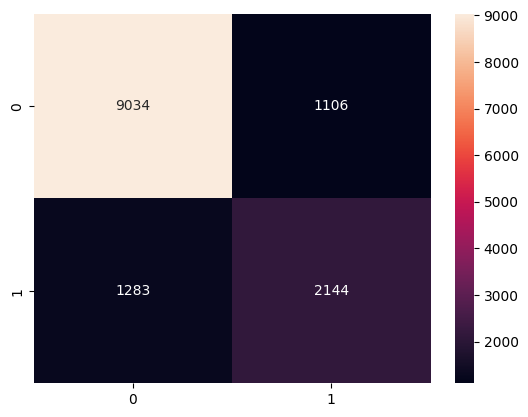

In [10]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

## Saving into DF then CSV

In [11]:
result_df = pd.DataFrame(results, columns=header)
result_df

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp
0,UnfairLR-decay,13,0.752488,1.000000,1.000000,1.000000,0.858765,0.858765,0.858765
1,UnfairLR-decay,29,0.828776,0.844086,0.918091,0.903167,0.836361,0.871150,0.864374
2,UnfairLR-decay,42,0.827302,0.822146,0.891904,0.872410,0.824716,0.858389,0.849257
3,UnfairLR-decay,55,0.824058,0.848684,0.913090,0.892921,0.836190,0.866293,0.857109
4,UnfairLR-decay,73,0.823911,0.797173,0.839292,0.774047,0.810321,0.831530,0.798201


In [12]:
# result_df.to_csv(f'{data_name}-result/unfair_lr-{epochs}.csv')

# Load balanced data

In [13]:
data_name = 'adult-mpa-balanced'

In [14]:
x, y, a = load_data(data_name)
raw_data = (x, y, a)

## Testing

In [15]:
results= []
for cv_seed in cv_seeds:
        x_train, x_test, y_train, y_test, a_train, a_test = train_test_split(
                x, y, a, test_size=0.3, random_state=cv_seed
        )
        y_train = y_train.ravel()
        y_test = y_test.ravel()
        
        model = UnfairNN(epochs, learning_rate, batch_size, xdim, ydim)
        h = model.fit(x_train, y_train)
         
        Y_hat = model.predict(x_test)

        clas_acc, dp, deqodds, deqopp, confusion_matrix  = compute_metrics(Y=y_test, A=a_test, Y_hat=Y_hat.reshape(y_test.shape), adim=adim)
        
        fair_metrics = (dp, deqodds, deqopp)
        
        tradeoff = []
        
        for fair_metric in fair_metrics:
                tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
        
        result = ['UnfairLR-decay', cv_seed, clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]]

        results.append(result)
        

/Users/lffpl/Projects/falsb4mpa/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


> Evaluation
> Class Acc = 0.8074349164962769
> DP | DEqOdds | DEqOpp
> 0.6595508456230164 | 0.8274034261703491 | 0.8402000665664673
> Confusion Matrix 
TN: 2623.0 | FP: 722.0 
FN: 573.0 | TP: 2807.0


/Users/lffpl/Projects/falsb4mpa/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


> Evaluation
> Class Acc = 0.7991077899932861
> DP | DEqOdds | DEqOpp
> 0.7007068991661072 | 0.8310763835906982 | 0.7914424538612366
> Confusion Matrix 
TN: 2565.0 | FP: 783.0 
FN: 568.0 | TP: 2809.0


/Users/lffpl/Projects/falsb4mpa/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


> Evaluation
> Class Acc = 0.7921189665794373
> DP | DEqOdds | DEqOpp
> 0.7049165964126587 | 0.8504981994628906 | 0.8757523894309998
> Confusion Matrix 
TN: 2544.0 | FP: 792.0 
FN: 606.0 | TP: 2783.0


/Users/lffpl/Projects/falsb4mpa/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


> Evaluation
> Class Acc = 0.8035687804222107
> DP | DEqOdds | DEqOpp
> 0.6902655959129333 | 0.8382522463798523 | 0.8473601341247559
> Confusion Matrix 
TN: 2579.0 | FP: 764.0 
FN: 557.0 | TP: 2825.0
> Evaluation
> Class Acc = 0.8022304773330688
> DP | DEqOdds | DEqOpp
> 0.675230860710144 | 0.8295549154281616 | 0.8839120268821716
> Confusion Matrix 
TN: 2548.0 | FP: 851.0 
FN: 479.0 | TP: 2847.0


<Axes: >

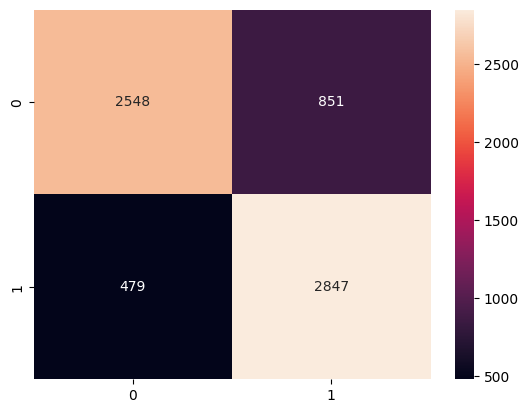

In [16]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

## Saving into DF then CSV

In [17]:
result_df = pd.DataFrame(results, columns=header)
result_df

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp
0,UnfairLR-decay,13,0.807435,0.659551,0.827403,0.840200,0.726039,0.817297,0.823492
1,UnfairLR-decay,29,0.799108,0.700707,0.831076,0.791442,0.746679,0.814779,0.795257
2,UnfairLR-decay,42,0.792119,0.704917,0.850498,0.875752,0.745978,0.820271,0.831839
3,UnfairLR-decay,55,0.803569,0.690266,0.838252,0.847360,0.742620,0.820544,0.824884
4,UnfairLR-decay,73,0.802230,0.675231,0.829555,0.883912,0.733272,0.815664,0.841093


In [18]:
# result_df.to_csv(f'{data_name}-result/unfair_lr-{epochs}.csv')